# MNIST Classifiers using machine learning (without Neural Networks)

In [1]:
# Install python packages
!pip install Pillow scikit-learn python-mnist matplotlib numpy

# Downloading MNIST Dataset
!mkdir -p data
!wget -nc -P ./data http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -nc -P ./data http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -nc -P ./data http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -nc -P ./data http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
    
# Extracting content
!yes n | gunzip ./data/train-images-idx3-ubyte.gz ./data/train-labels-idx1-ubyte.gz ./data/t10k-images-idx3-ubyte.gz ./data/t10k-labels-idx1-ubyte.gz

File ‘./data/train-images-idx3-ubyte.gz’ already there; not retrieving.

File ‘./data/train-labels-idx1-ubyte.gz’ already there; not retrieving.

File ‘./data/t10k-images-idx3-ubyte.gz’ already there; not retrieving.

File ‘./data/t10k-labels-idx1-ubyte.gz’ already there; not retrieving.

gzip: ./data/train-images-idx3-ubyte already exists;	not overwritten
gzip: ./data/train-labels-idx1-ubyte already exists;	not overwritten
gzip: ./data/t10k-images-idx3-ubyte already exists;	not overwritten
gzip: ./data/t10k-labels-idx1-ubyte already exists;	not overwritten
yes: standard output: Broken pipe


### Loading the Dataset

Label:  9


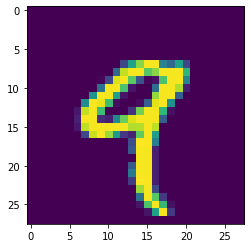

In [2]:
%matplotlib inline
from mnist import MNIST
from sklearn import datasets
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
mndata = MNIST("./data/")
images, labels = mndata.load_training()

# Pick the fifth image from the dataset (it's a 9)
image, label = images[4], labels[4]

# Print the image
output = Image.new("L", (28, 28))
output.putdata(image)
imshow(np.asarray(output))
print("Label: ",label) # Print label

### Splitting the dataset

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, expected = train_test_split(images, labels, train_size=0.20, test_size=0.05) # 20% for the test dataset
print("Train: ",len(train_y), "  Test: ", len(expected))

Train:  12000   Test:  3000


## K-Nearest Neighbors

In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

Accuracy:  0.945

Confusion Matrix:
 [[295   0   0   0   0   0   0   0   0   1]
 [  0 352   2   1   0   0   0   0   0   0]
 [  3  10 283   2   1   0   1  10   1   1]
 [  0   2   3 281   2   9   1   1   1   1]
 [  0   4   0   0 263   0   1   0   0  12]
 [  1   2   1   8   2 248   2   0   2   4]
 [  2   1   1   0   0   1 284   0   0   0]
 [  0   6   0   0   4   0   0 284   0   2]
 [  4   5   1   8   1   6   2   4 274   7]
 [  0   3   1   1   4   1   0   8   0 271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       296
           1       0.91      0.99      0.95       355
           2       0.97      0.91      0.94       312
           3       0.93      0.93      0.93       301
           4       0.95      0.94      0.94       280
           5       0.94      0.92      0.93       270
           6       0.98      0.98      0.98       289
           7       0.93      0.96      0.94       296
           8       0

## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

Accuracy:  0.82

Confusion Matrix:
 [[265   0   2   5   4  11   3   1   3   2]
 [  0 336   4   3   0   4   1   1   5   1]
 [  0   4 240  15   5   7  13   5  13  10]
 [  3   2  11 235   3  18   4   7   9   9]
 [  2   1   5   6 222   7   9   4   5  19]
 [  6   0   1  13  10 203  10   6  13   8]
 [  3   2   3   4   3   8 256   0   7   3]
 [  0   4   6   6   6   3   3 252   3  13]
 [  9   5  11  15  15  14   5  10 213  15]
 [  3   2   3   7  14   6   2   8   6 238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       296
           1       0.94      0.95      0.95       355
           2       0.84      0.77      0.80       312
           3       0.76      0.78      0.77       301
           4       0.79      0.79      0.79       280
           5       0.72      0.75      0.74       270
           6       0.84      0.89      0.86       289
           7       0.86      0.85      0.85       296
           8       0.

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

Accuracy:  0.943

Confusion Matrix:
 [[293   0   0   0   0   0   0   0   2   1]
 [  0 349   4   0   1   0   0   1   0   0]
 [  0   1 289   2   6   0   5   2   5   2]
 [  1   1   6 277   0   6   1   4   5   0]
 [  1   0   0   0 263   0   1   1   2  12]
 [  4   0   0   6   1 255   1   0   1   2]
 [  2   1   0   0   0   4 281   0   1   0]
 [  1   5   5   0   4   1   0 274   1   5]
 [  2   3   2   5   2   3   3   1 282   9]
 [  0   3   1   1   9   1   0   6   2 266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       296
           1       0.96      0.98      0.97       355
           2       0.94      0.93      0.93       312
           3       0.95      0.92      0.94       301
           4       0.92      0.94      0.93       280
           5       0.94      0.94      0.94       270
           6       0.96      0.97      0.97       289
           7       0.95      0.93      0.94       296
           8       0

## SVM - Linear SVC

In [7]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

Accuracy:  0.9046666666666666

Confusion Matrix:
 [[290   0   2   0   0   3   1   0   0   0]
 [  0 345   3   1   1   0   0   1   4   0]
 [  1   6 272   6  10   2   3   3   8   1]
 [  2   5   9 267   0  11   0   0   5   2]
 [  1   0   2   0 254   0   0   1   1  21]
 [  4   1   3  15   1 240   2   0   3   1]
 [  0   2   6   0   2   4 274   0   1   0]
 [  0   4   8   1   4   0   0 269   1   9]
 [  5   8   9  27   1   6   4   2 242   8]
 [  0   3   3   0  10   0   0  12   0 261]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       296
           1       0.92      0.97      0.95       355
           2       0.86      0.87      0.86       312
           3       0.84      0.89      0.86       301
           4       0.90      0.91      0.90       280
           5       0.90      0.89      0.90       270
           6       0.96      0.95      0.96       289
           7       0.93      0.91      0.92       296
       

## SVM - Polynomial

In [8]:
clf = SVC(kernel='poly')
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.952

Confusion Matrix:
 [[293   0   2   0   0   0   0   0   0   1]
 [  0 350   2   1   1   0   0   1   0   0]
 [  1   4 288   2   4   0   2   5   4   2]
 [  2   2   5 282   0   4   0   0   5   1]
 [  1   1   2   0 268   0   0   1   0   7]
 [  1   2   0   3   1 255   1   0   2   5]
 [  2   1   1   0   1   2 281   0   1   0]
 [  1   4   2   1   3   1   0 282   0   2]
 [  3   2   2   7   1   1   4   1 283   8]
 [  0   2   1   0   8   0   0   4   0 274]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       296
           1       0.95      0.99      0.97       355
           2       0.94      0.92      0.93       312
           3       0.95      0.94      0.94       301
           4       0.93      0.96      0.95       280
           5       0.97      0.94      0.96       270
           6       0.98      0.97      0.97       289
           7       0.96      0.95      0.96       296
           8       0

## SVM - Radial Basis Function (RBF)

In [9]:
clf = SVC(kernel='rbf')
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.11833333333333333

Confusion Matrix:
 [[  0 296   0   0   0   0   0   0   0   0]
 [  0 355   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 280   0   0   0   0   0   0   0   0]
 [  0 270   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   0   0]
 [  0 296   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.12      1.00      0.21       355
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       301
           4       0.00      0.00      0.00       280
           5       0.00      0.00      0.00       270
           6       0.00      0.00      0.00       289
           7       0.00      0.00      0.00       296
      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM - Sigmoid

In [10]:
clf = SVC(kernel='sigmoid')
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

print("Accuracy: ", accuracy_score(expected, predicted))
print("\nConfusion Matrix:\n",confusion_matrix(expected, predicted))
print("\nClassification Report:\n",classification_report(expected, predicted))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.11833333333333333

Confusion Matrix:
 [[  0 296   0   0   0   0   0   0   0   0]
 [  0 355   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 280   0   0   0   0   0   0   0   0]
 [  0 270   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   0   0]
 [  0 296   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.12      1.00      0.21       355
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       301
           4       0.00      0.00      0.00       280
           5       0.00      0.00      0.00       270
           6       0.00      0.00      0.00       289
           7       0.00      0.00      0.00       296
      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
